In [23]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#loading dataset
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
type(df)

pandas.core.frame.DataFrame

In [17]:
#Finding the best number of cluster using elbow method
wcss = [] # Within cluster sum of squares
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 250, n_init = 10, random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

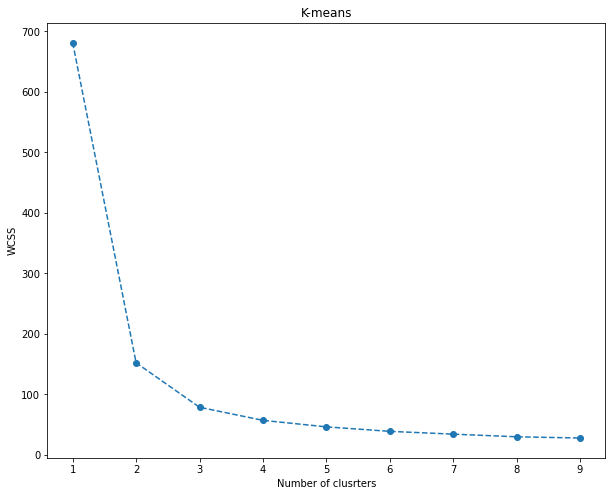

In [22]:
#plotting the wcss
plt.figure(figsize = (10,8))
plt.plot(range(1,10), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of clusrters')
plt.ylabel('WCSS')
plt.title('K-means')
plt.show()


From above graph, by using elbow method we can conclude that number of clusters we should take is 3

In [30]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 250, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(df)
y = pd.Series(y_kmeans)

In [39]:
y = y.map({0:'setosa',1:'versicolor', 2:'virginica'})

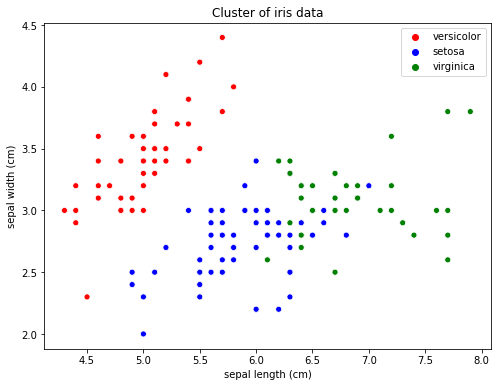

In [40]:
# visualizing the clustered dataset by KMeans on first two columns

xlabel = df['sepal length (cm)']
ylabel = df['sepal width (cm)']
plt.figure(figsize = (8,6))
sns.scatterplot(xlabel,ylabel,hue = y, palette = ['r', 'b','g'], legend='brief')
plt.title('Cluster of iris data')
plt.show()